In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload

import pipeline_v200
import helper_functions

reload(pipeline_v200)
reload(helper_functions)

sns.set_palette("Set2")
# sns.color_palette("Set2")

In [2]:
n = 5 ## numero finale di qubit
N = 10 ## numero di qubit prima della traccia parziale

a_x= 1
h_z = 1.5 #hardcoded

delta = 0.5
derivative_delta = 1e-5

m_s = range(1, 32)

DEBUG=True

initial_state = helper_functions.random_mixed_density_matrix(N, n)


y_s = np.array([pipeline_v200.simulation(
                        N=N,
                        n=n,
                        initial_state= initial_state,
                        DEBUG=False,
                        derivative_delta=derivative_delta,
                        a_x= a_x, 
                        h_z= h_z, ## variable
                        delta = delta,
                        m = m) for m in m_s])

Generating random mixed density matrix


In [3]:
y_s[0]

{'fidelity_truncated': 0.07205447260879805,
 'fidelity_truncated_generalized': (0.9917369863306211-1.884780191698344e-18j),
 'correction_term': (0.9196825137218231-1.884780191698344e-18j),
 'fidelity_true': 0.83617167479870625757,
 'lower_tqfi': (0.2644164374201239+6.031296613434701e-17j),
 'upper_tqfi': 29.694256876518462,
 'qfi_fidelity': 5.2425064064413997578,
 'sub_qfi_bound': 0.03732529742449486,
 'super_qfi_bound': (29.694256873756682-2.7617823641805474e-09j),
 'H_delta': (0.2644164374201239+6.031296613434701e-17j),
 'J_delta': (29.694256873756682-2.7617823641805474e-09j),
 'QFI_from_SLD': 7.040775535576676}

In [4]:

# Assuming y_s is your list of dictionaries
data = []
for i, item in enumerate(y_s):
    data.append({
        "m": i,
        "fidelity_truncated": item["fidelity_truncated"],
        "fidelity_true": item["fidelity_true"],
        "fidelity_truncated_generalized": item["fidelity_truncated_generalized"]
    })

df = pd.DataFrame(data)
df

,m,fidelity_truncated,fidelity_true,fidelity_truncated_generalized
0,0,0.072054,0.836172,0.991737-0.000000j
1,1,0.148655,0.836172,0.989417-0.000000j
2,2,0.209649,0.836172,0.982316-0.000000j
3,3,0.272376,0.836172,0.977243-0.000000j
4,4,0.325831,0.836172,0.970702-0.000000j
5,5,0.383482,0.836172,0.966335-0.000000j
6,6,0.423108,0.836172,0.958325-0.000000j
7,7,0.464583,0.836172,0.952919-0.000000j
8,8,0.505375,0.836172,0.948212-0.000000j
9,9,0.544010,0.836172,0.942494-0.000000j


/home/ronin/miniforge3/envs/space/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ronin/miniforge3/envs/space/lib/python3.12/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


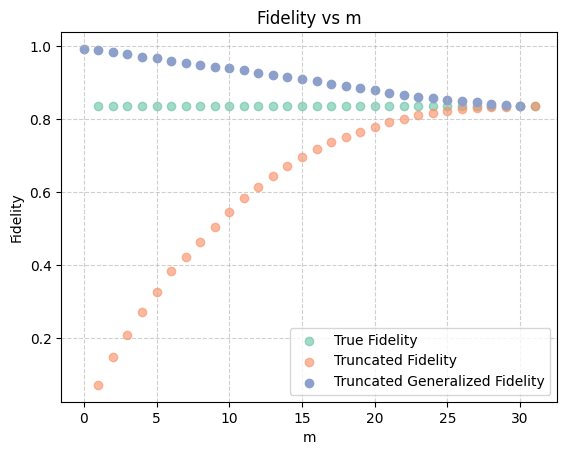

In [5]:
plt.scatter((1 + df["m"]), df["fidelity_true"], label="True Fidelity", alpha = 0.6)
plt.scatter((1 + df["m"]), df["fidelity_truncated"], label="Truncated Fidelity", alpha = 0.6)
plt.scatter(df["m"], df["fidelity_truncated_generalized"], label="Truncated Generalized Fidelity")

plt.xlabel("m")
plt.ylabel("Fidelity")
plt.title("Fidelity vs m")
plt.legend()

plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.show()
